# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import altair as alt


In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_goalie_stats.csv")

# game_plays: As jogadas individuais de cada jogo
#game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")
    
# game_plays_player: Os jogadores envolvidos em uma jogada
#game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")
    
# game_shifts: Detalhes a respeito dos turnos dos jogadores
#game_shifts = pd.read_csv("https://dl.dropbox.com/s/j8s06eo3osisrr0/game_shifts.csv?dl=0")

# game_skater_stats: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time
#game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/team_info.csv")

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [5]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [6]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


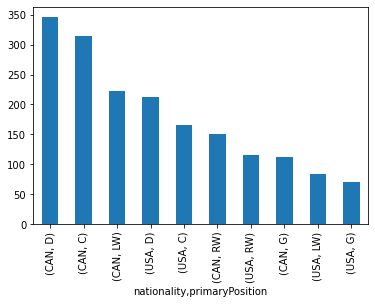

In [7]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')

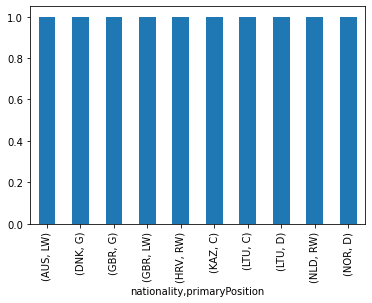

In [8]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().sort_values()[:10].plot(kind='bar')

In [9]:
table = player_info.groupby(['nationality'])['primaryPosition'].value_counts().to_frame()

In [10]:
table = table.unstack()

In [11]:
table.fillna(0, inplace=True)

In [12]:
table.rename(columns={'primaryPosition':'num_jogadores'}, inplace=True)

In [13]:
table

num_jogadores                            
primaryPosition             C      D      G     LW     RW
nationality                                              
AUS                       0.0    0.0    0.0    1.0    0.0
AUT                       0.0    0.0    0.0    2.0    2.0
BHS                       1.0    0.0    0.0    0.0    0.0
BLR                       1.0    3.0    0.0    2.0    0.0
CAN                     314.0  346.0  113.0  223.0  150.0
CHE                       4.0    9.0    3.0    2.0    6.0
CZE                      20.0   30.0   13.0   10.0   23.0
DEU                       6.0    4.0    5.0    3.0    2.0
DNK                       4.0    2.0    1.0    2.0    5.0
FIN                      21.0   25.0   20.0   19.0   15.0
FRA                       2.0    2.0    0.0    2.0    0.0
GBR                       0.0    0.0    1.0    1.0    0.0
HRV                       0.0    0.0    0.0    0.0    1.0
KAZ                       1.0    0.0    0.0    0.0    0.0
LTU                       1.0    1.0    0.0    0.0    0.0
LVA                       2.0    3.0    2.0    4.0    0.0
NGA                       0.0    0.0    0.0    0.0    1.0
NLD                       0.0    0.0    0.0    0.0    1.0
NOR                       0.0    1.0    0.0    1.0    1.0
RUS                      19.0   30.0   11.0   16.0   23.0
SVK                       5.0    9.0    2.0    4.0    5.0
SVN                       1.0    0.0    0.0    1.0    0.0
SWE                      43.0   65.0   22.0   34.0   20.0
UKR                       0.0    1.0    0.0    2.0    0.0
USA                     165.0  212.0   71.0   83.0  116.0

In [14]:
nhl_eda = pd.merge(game, game_teams_stats, on='game_id')

In [15]:
nhl_eda.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [16]:
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [17]:
team_dict = team_info.set_index('team_id')['teamName'].to_dict()


In [18]:
team_dict

{1: 'Devils',
 4: 'Flyers',
 26: 'Kings',
 14: 'Lightning',
 6: 'Bruins',
 3: 'Rangers',
 5: 'Penguins',
 17: 'Red Wings',
 28: 'Sharks',
 18: 'Predators',
 23: 'Canucks',
 16: 'Blackhawks',
 9: 'Senators',
 8: 'Canadiens',
 30: 'Wild',
 15: 'Capitals',
 19: 'Blues',
 24: 'Ducks',
 27: 'Coyotes',
 2: 'Islanders',
 10: 'Maple Leafs',
 13: 'Panthers',
 7: 'Sabres',
 20: 'Flames',
 21: 'Avalanche',
 25: 'Stars',
 29: 'Blue Jackets',
 52: 'Jets',
 22: 'Oilers',
 54: 'Golden Knights',
 12: 'Hurricanes',
 53: 'Coyotes',
 11: 'Thrashers'}

In [19]:
# aplicando no nosso DataFrame
nhl_eda['team_id'].replace(team_dict, inplace=True)
nhl_eda['away_team_id'].replace(team_dict, inplace=True)
nhl_eda['home_team_id'].replace(team_dict, inplace=True)

In [20]:
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

In [21]:
nhl_eda = nhl_eda.drop(labels=cols_drop, axis=1)

In [22]:
nhl_eda.head(3)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [23]:
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')

In [24]:
# criando coluna resultado
nhl_eda['outcome'] = nhl_eda['won'].map({False:'Lose', True:'Win'})

# excluindo coluna redundante
nhl_eda.drop('won', axis=1, inplace=True)

In [25]:
nhl_eda.head()

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Flyers,home,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6,Lose
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Flyers,away,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1,Lose


In [26]:
# Series with number of wins
teams_wins = nhl_eda[nhl_eda['outcome']=='Win']['team_id'].value_counts()

# Series with number of defeats
team_deafeats = nhl_eda[nhl_eda['outcome']=='Lose']['team_id'].value_counts()

# concatenando Series 
teams_performance = pd.concat([teams_wins, team_deafeats], axis=1, keys=['wins','deafeats'])

# add columns with number of total games
teams_performance['total_games'] = teams_performance['wins'] + teams_performance['deafeats']

# add column with win rate
teams_performance['win_rate_%'] = round(teams_performance['wins']/teams_performance['total_games'], 4)


In [27]:
teams_performance

,wins,deafeats,total_games,win_rate_%
Penguins,478,337,815,0.5865
Bruins,465,347,812,0.5727
Capitals,461,343,804,0.5734
Lightning,449,341,790,0.5684
Blues,445,343,788,0.5647
Sharks,442,363,805,0.5491
Blackhawks,436,357,793,0.5498
Rangers,426,376,802,0.5312
Ducks,423,351,774,0.5465
Predators,418,369,787,0.5311


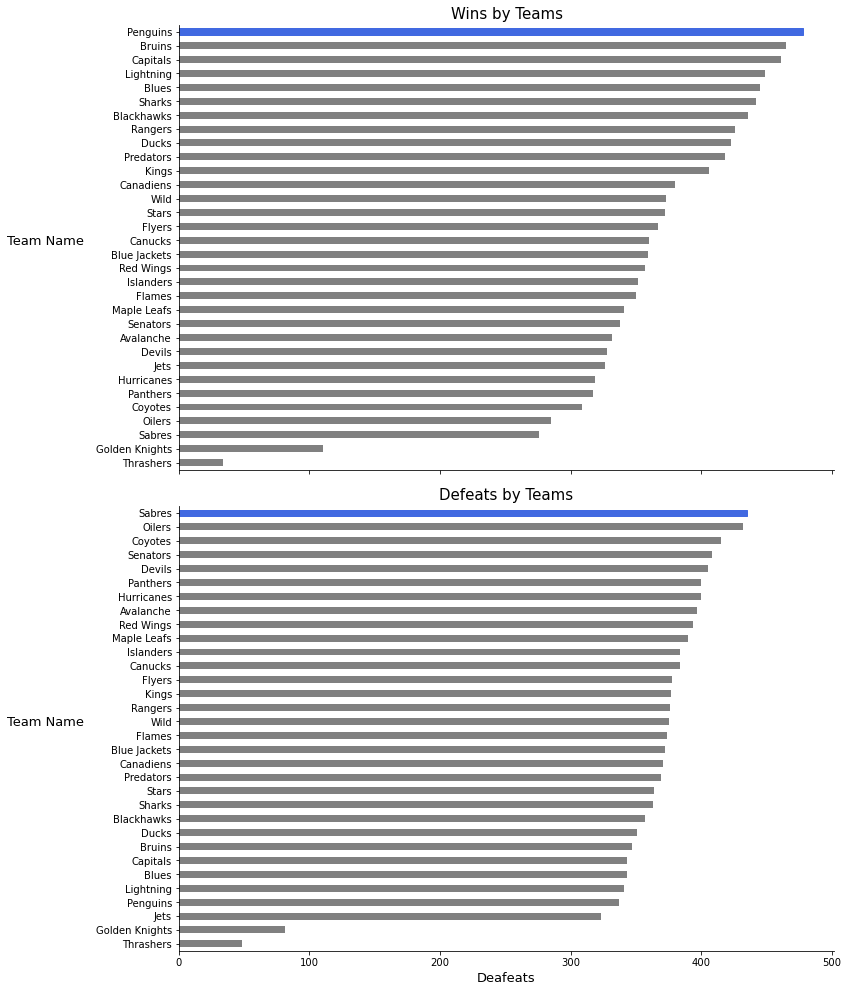

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,sharex=True, figsize=(12, 14))
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=12)

# wins
teams_performance['wins'].sort_values().plot(kind='barh', color='gray', ax=ax1)
ax1.set_title("Wins by Teams", fontsize=15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.patches[31].set_color('royalblue')
ax1.set_xlabel('Wins', fontsize=13)
ax1.set_ylabel('Team Name', fontsize=13, rotation=0, labelpad=50)


# loses
teams_performance['deafeats'].sort_values().plot(kind='barh', color='gray', ax=ax2)
ax2.set_title("Defeats by Teams", fontsize=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.patches[31].set_color('royalblue')
ax2.set_xlabel('Deafeats', fontsize=13)
ax2.set_ylabel('Team Name', fontsize=13, rotation=0, labelpad=50)

plt.tight_layout(pad=1.5)

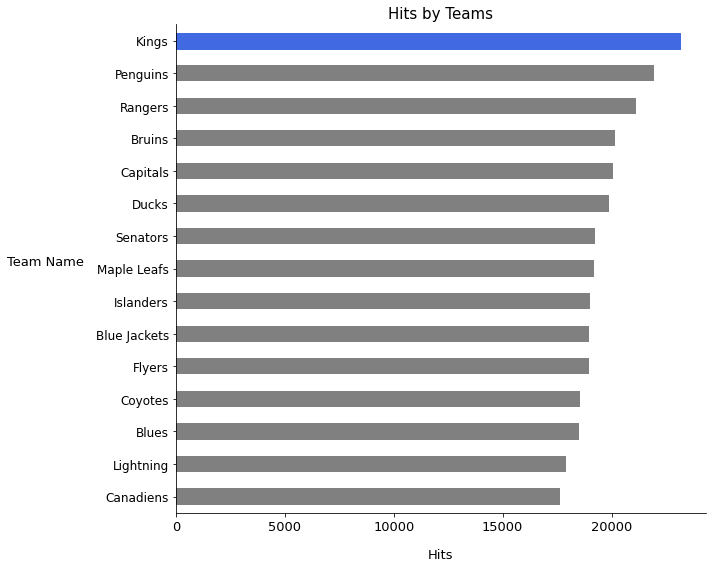

In [29]:
teams_hits = nhl_eda.groupby(['team_id'])['hits'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_hits.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("Hits by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=50)
ax.set_xlabel("Hits", fontsize=13, labelpad=15)


# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

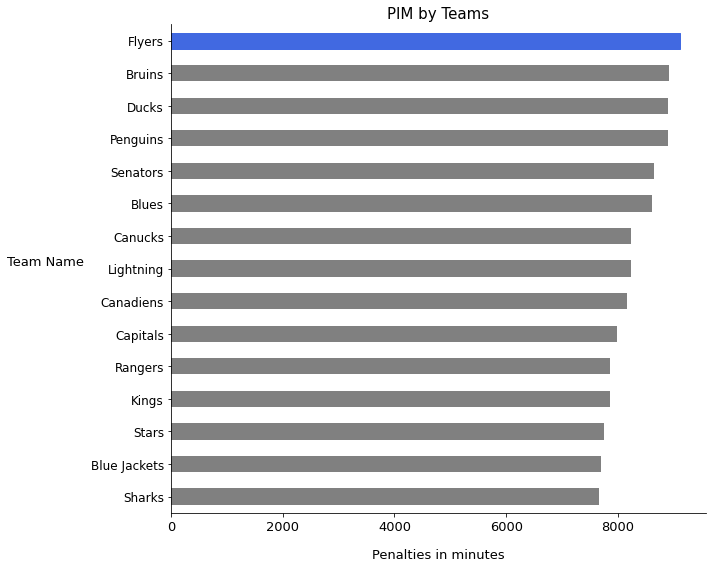

In [30]:
teams_pim = nhl_eda.groupby(['team_id'])['pim'].sum().nlargest(15)
fig, ax = plt.subplots(figsize=(10, 8))
teams_pim.sort_values().plot(kind='barh', color='gray', ax=ax)
# nomeando
ax.set_title("PIM by Teams", fontsize=15)
ax.set_ylabel("Team Name",fontsize=13, rotation= 0, labelpad=45)
ax.set_xlabel("Penalties in minutes", fontsize=13, labelpad=15)

# estilizando
ax.patches[14].set_color('royalblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [31]:
# goals
nhl_eda.head(3)

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win


In [32]:
# devils
devilsdf = nhl_eda[nhl_eda['team_id'] == 'Devils']

gols_tomados_times_mandantes = devilsdf[(devilsdf['team_id'] == "Devils") & (devilsdf['HoA'] == 'away') & 
                                        (devilsdf['away_team_id']== "Devils")]['home_goals']

gols_tomados_times_visitantes = devilsdf[(devilsdf['HoA']=='home') & (devilsdf['team_id']=='Devils') & 
                                         (devilsdf['home_team_id']=='Devils')]['away_goals']

devilsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose,4
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win,1
5,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Devils,home,OT,Peter DeBoer,4,31,30,10,2,1,49.2,11,4,Win,3
7,2011030224,20112012,P,2012-05-06,Flyers,Devils,2,4,Devils,home,REG,Peter DeBoer,4,43,19,4,5,1,37.5,5,3,Win,2
8,2011030225,20112012,P,2012-05-08,Devils,Flyers,3,1,Devils,away,REG,Peter DeBoer,3,30,26,2,4,1,55.0,6,5,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22548,2018021199,20182019,R,2019-03-29,Devils,Red Wings,0,4,Devils,away,REG,John Hynes,0,28,44,2,1,0,47.1,13,5,Lose,4
22567,2018021207,20182019,R,2019-03-30,Blues,Devils,3,2,Devils,home,OT,John Hynes,2,27,20,2,3,1,47.8,11,10,Lose,3
22595,2018021222,20182019,R,2019-04-01,Rangers,Devils,2,4,Devils,home,REG,John Hynes,4,41,23,21,4,1,66.7,10,5,Win,2
22644,2018021247,20182019,R,2019-04-04,Devils,Hurricanes,1,3,Devils,away,REG,John Hynes,1,37,30,4,3,0,50.0,7,10,Lose,3


In [33]:
nhl_eda['team_id'].unique()

array(['Devils', 'Flyers', 'Kings', 'Lightning', 'Bruins', 'Rangers',
       'Penguins', 'Red Wings', 'Sharks', 'Predators', 'Canucks',
       'Blackhawks', 'Senators', 'Canadiens', 'Wild', 'Capitals', 'Blues',
       'Ducks', 'Coyotes', 'Islanders', 'Maple Leafs', 'Panthers',
       'Sabres', 'Flames', 'Avalanche', 'Stars', 'Blue Jackets', 'Jets',
       'Oilers', 'Golden Knights', 'Hurricanes', 'Thrashers'],
      dtype=object)

In [84]:
# Flyers
Flyersdf = nhl_eda[nhl_eda['team_id'] == 'Flyers']

gols_tomados_times_mandantes = Flyersdf[(Flyersdf['team_id'] == "Flyers") & (Flyersdf['HoA'] == 'away') & 
                                        (Flyersdf['away_team_id']== "Flyers")]['home_goals']

gols_tomados_times_visitantes = Flyersdf[(Flyersdf['HoA']=='home') & (Flyersdf['team_id']=='Flyers') & 
                                         (Flyersdf['home_team_id']=='Flyers')]['away_goals']

FlyersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win,3
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Flyers,home,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6,Lose,4
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Flyers,away,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1,Lose,4
6,2011030224,20112012,P,2012-05-06,Flyers,Devils,2,4,Flyers,away,REG,Peter Laviolette,2,22,23,10,2,1,62.5,20,5,Lose,4
9,2011030225,20112012,P,2012-05-08,Devils,Flyers,3,1,Flyers,home,REG,Peter Laviolette,1,28,38,8,1,0,45.0,14,7,Lose,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22558,2018021203,20182019,R,2019-03-30,Flyers,Hurricanes,2,5,Flyers,away,REG,Scott Gordon,2,32,19,14,3,1,37.9,10,8,Lose,5
22581,2018021215,20182019,R,2019-03-31,Rangers,Flyers,3,0,Flyers,home,REG,Scott Gordon,0,29,20,4,4,0,59.6,10,11,Lose,3
22620,2018021235,20182019,R,2019-04-03,Flyers,Stars,2,6,Flyers,away,REG,Scott Gordon,2,34,18,12,4,1,49.3,10,7,Lose,6
22646,2018021248,20182019,R,2019-04-05,Flyers,Blues,3,7,Flyers,away,REG,Scott Gordon,3,29,9,10,4,0,51.9,9,13,Lose,7


In [35]:
# Kings
kingsdf = nhl_eda[nhl_eda['team_id'] == 'Kings']

gols_tomados_times_mandantes = kingsdf[(kingsdf['team_id'] == 'Kings') & (kingsdf['HoA'] == 'away') & 
                                        (kingsdf['away_team_id']== 'Kings')]['home_goals']

gols_tomados_times_visitantes = kingsdf[(kingsdf['HoA']=='home') & (kingsdf['team_id']=='Kings') & 
                                         (kingsdf['home_team_id']=='Kings')]['away_goals']

kingsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
10,2011030411,20112012,P,2012-05-31,Kings,Devils,2,1,Kings,away,OT,Darryl Sutter,2,25,35,4,1,0,55.4,6,4,Win,1
12,2011030412,20112012,P,2012-06-03,Kings,Devils,2,1,Kings,away,OT,Darryl Sutter,2,32,32,8,2,0,53.5,1,3,Win,1
15,2011030413,20112012,P,2012-06-05,Devils,Kings,0,4,Kings,home,REG,Darryl Sutter,4,21,55,12,2,2,56.6,17,5,Win,0
17,2011030414,20112012,P,2012-06-07,Devils,Kings,3,1,Kings,home,REG,Darryl Sutter,1,22,33,6,4,1,46.0,17,3,Lose,3
18,2011030415,20112012,P,2012-06-10,Kings,Devils,1,2,Kings,away,REG,Darryl Sutter,1,26,23,6,2,0,47.2,5,0,Lose,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22579,2018021214,20182019,R,2019-03-31,Blackhawks,Kings,2,3,Kings,home,OT,Willie Desjardins,3,29,21,6,3,1,54.2,14,6,Win,2
22607,2018021228,20182019,R,2019-04-02,Flames,Kings,7,2,Kings,home,REG,Willie Desjardins,2,25,15,2,3,0,46.4,6,3,Lose,7
22626,2018021238,20182019,R,2019-04-03,Kings,Coyotes,3,1,Kings,away,REG,Willie Desjardins,3,24,31,27,1,0,44.6,9,6,Win,1
22662,2018021256,20182019,R,2019-04-06,Kings,Ducks,2,5,Kings,away,REG,Willie Desjardins,2,46,21,22,5,0,57.7,13,4,Lose,5


In [36]:
# Lightning
lightningdf = nhl_eda[nhl_eda['team_id'] == 'Lightning']

gols_tomados_times_mandantes = lightningdf[(lightningdf['team_id'] == 'Lightning') & (lightningdf['HoA'] == 'away') & 
                                        (lightningdf['away_team_id']== 'Lightning')]['home_goals']

gols_tomados_times_visitantes = lightningdf[(lightningdf['HoA']=='home') & (lightningdf['team_id']=='Lightning') & 
                                         (lightningdf['home_team_id']=='Lightning')]['away_goals']

lightningGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
22,2010030311,20102011,P,2011-05-15,Lightning,Bruins,5,2,Lightning,away,REG,Guy Boucher,5,34,23,8,5,1,61.2,5,4,Win,2
24,2010030312,20102011,P,2011-05-18,Lightning,Bruins,5,6,Lightning,away,REG,Guy Boucher,5,41,24,16,4,1,43.8,9,4,Lose,6
27,2010030313,20102011,P,2011-05-20,Bruins,Lightning,2,0,Lightning,home,REG,Guy Boucher,0,31,23,8,3,0,43.1,9,7,Lose,2
29,2010030314,20102011,P,2011-05-21,Bruins,Lightning,3,5,Lightning,home,REG,Guy Boucher,5,37,26,21,2,0,60.0,12,14,Win,3
30,2010030315,20102011,P,2011-05-24,Lightning,Bruins,1,3,Lightning,away,REG,Guy Boucher,1,34,18,10,4,0,42.3,5,8,Lose,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22664,2018021257,20182019,R,2019-04-06,Lightning,Bruins,6,3,Lightning,away,REG,Jon Cooper,6,22,27,16,2,1,63.8,14,10,Win,3
22695,2018030111,20182019,P,2019-04-10,Blue Jackets,Lightning,4,3,Lightning,home,REG,Jon Cooper,3,29,31,6,3,0,48.2,8,9,Lose,4
22711,2018030112,20182019,P,2019-04-12,Blue Jackets,Lightning,5,1,Lightning,home,REG,Jon Cooper,1,24,37,38,2,0,55.0,9,4,Lose,5
22728,2018030113,20182019,P,2019-04-14,Lightning,Blue Jackets,1,3,Lightning,away,REG,Jon Cooper,1,31,44,8,0,0,42.9,7,5,Lose,3


In [40]:
# Bruins
Bruinsdf = nhl_eda[nhl_eda['team_id'] == 'Bruins']

gols_tomados_times_mandantes = Bruinsdf[(Bruinsdf['team_id'] == "Bruins") & (Bruinsdf['HoA'] == 'away') & 
                                        (Bruinsdf['away_team_id']== "Bruins")]['home_goals']

gols_tomados_times_visitantes = Bruinsdf[(Bruinsdf['HoA']=='home') & (Bruinsdf['team_id']=='Bruins') & 
                                         (Bruinsdf['home_team_id']=='Bruins')]['away_goals']

BruinsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
23,2010030311,20102011,P,2011-05-15,Lightning,Bruins,5,2,Bruins,home,REG,Claude Julien,2,33,26,30,4,0,38.8,10,4,Lose,5
25,2010030312,20102011,P,2011-05-18,Lightning,Bruins,5,6,Bruins,home,REG,Claude Julien,6,35,30,12,6,2,56.2,11,2,Win,5
26,2010030313,20102011,P,2011-05-20,Bruins,Lightning,2,0,Bruins,away,REG,Claude Julien,2,25,19,8,3,0,56.9,7,6,Win,0
28,2010030314,20102011,P,2011-05-21,Bruins,Lightning,3,5,Bruins,away,REG,Claude Julien,3,30,22,11,2,0,40.0,10,3,Lose,5
31,2010030315,20102011,P,2011-05-24,Lightning,Bruins,1,3,Bruins,home,REG,Claude Julien,3,20,25,10,4,0,57.7,9,2,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22858,2018030413,20182019,P,2019-06-02,Bruins,Blues,7,2,Bruins,away,REG,Bruce Cassidy,7,24,29,16,4,4,55.6,4,11,Win,2
22860,2018030414,20182019,P,2019-06-04,Bruins,Blues,2,4,Bruins,away,REG,Bruce Cassidy,2,23,41,8,2,0,47.7,6,9,Lose,4
22863,2018030415,20182019,P,2019-06-07,Blues,Bruins,2,1,Bruins,home,REG,Bruce Cassidy,1,39,43,2,3,0,40.6,4,11,Lose,2
22864,2018030416,20182019,P,2019-06-10,Bruins,Blues,5,1,Bruins,away,REG,Bruce Cassidy,5,32,27,10,4,1,41.3,4,10,Win,1


In [41]:
# Rangers
Rangersdf = nhl_eda[nhl_eda['team_id'] == 'Rangers']

gols_tomados_times_mandantes = Rangersdf[(Rangersdf['team_id'] == "Rangers") & (Rangersdf['HoA'] == 'away') & 
                                        (Rangersdf['away_team_id']== "Rangers")]['home_goals']

gols_tomados_times_visitantes = Rangersdf[(Rangersdf['HoA']=='home') & (Rangersdf['team_id']=='Rangers') & 
                                         (Rangersdf['home_team_id']=='Rangers')]['away_goals']

RangersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
36,2012030221,20122013,P,2013-05-16,Rangers,Bruins,2,3,Rangers,away,OT,John Tortorella,2,35,44,8,3,0,44.8,17,7,Lose,3
38,2012030222,20122013,P,2013-05-19,Rangers,Bruins,2,5,Rangers,away,REG,John Tortorella,2,37,33,11,5,0,51.7,1,4,Lose,5
41,2012030223,20122013,P,2013-05-21,Bruins,Rangers,2,1,Rangers,home,REG,John Tortorella,1,24,37,2,2,0,38.2,7,9,Lose,2
43,2012030224,20122013,P,2013-05-23,Bruins,Rangers,3,4,Rangers,home,OT,John Tortorella,4,32,40,8,4,1,46.3,9,7,Win,3
44,2012030225,20122013,P,2013-05-25,Rangers,Bruins,1,3,Rangers,away,REG,John Tortorella,1,29,25,13,2,1,50.9,5,3,Lose,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,2018021215,20182019,R,2019-03-31,Rangers,Flyers,3,0,Rangers,away,REG,David Quinn,3,25,15,8,2,0,40.4,2,8,Win,0
22594,2018021222,20182019,R,2019-04-01,Rangers,Devils,2,4,Rangers,away,REG,David Quinn,2,32,20,25,2,1,33.3,5,5,Lose,4
22629,2018021239,20182019,R,2019-04-03,Senators,Rangers,4,1,Rangers,home,REG,David Quinn,1,28,26,32,2,0,37.0,13,9,Lose,4
22659,2018021254,20182019,R,2019-04-05,Blue Jackets,Rangers,3,2,Rangers,home,SO,David Quinn,2,27,29,4,0,0,32.4,21,9,Lose,3


In [42]:
# Penguins
Penguinsdf = nhl_eda[nhl_eda['team_id'] == 'Penguins']

gols_tomados_times_mandantes = Penguinsdf[(Penguinsdf['team_id'] == "Penguins") & (Penguinsdf['HoA'] == 'away') & 
                                        (Penguinsdf['away_team_id']== "Penguins")]['home_goals']

gols_tomados_times_visitantes = Penguinsdf[(Penguinsdf['HoA']=='home') & (Penguinsdf['team_id']=='Penguins') & 
                                         (Penguinsdf['home_team_id']=='Penguins')]['away_goals']

PenguinsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
47,2012030311,20122013,P,2013-06-02,Bruins,Penguins,3,0,Penguins,home,REG,Dan Bylsma,0,29,34,28,4,0,33.3,8,9,Lose,3
49,2012030312,20122013,P,2013-06-04,Bruins,Penguins,6,1,Penguins,home,REG,Dan Bylsma,1,27,37,4,2,0,49.1,12,5,Lose,6
50,2012030313,20122013,P,2013-06-06,Penguins,Bruins,1,2,Penguins,away,OT,Dan Bylsma,1,54,46,16,6,0,57.3,8,10,Lose,2
52,2012030314,20122013,P,2013-06-08,Penguins,Bruins,0,1,Penguins,away,REG,Dan Bylsma,0,26,33,8,3,0,47.5,8,1,Lose,1
237,2012030111,20122013,P,2013-05-01,Islanders,Penguins,0,5,Penguins,home,REG,Dan Bylsma,5,26,36,38,4,2,48.4,2,7,Win,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22679,2018021264,20182019,R,2019-04-06,Rangers,Penguins,4,3,Penguins,home,OT,Mike Sullivan,3,39,24,0,4,0,54.8,17,10,Lose,4
22696,2018030141,20182019,P,2019-04-10,Penguins,Islanders,3,4,Penguins,away,OT,Mike Sullivan,3,44,43,8,3,1,45.3,22,10,Lose,4
22712,2018030142,20182019,P,2019-04-12,Penguins,Islanders,1,3,Penguins,away,REG,Mike Sullivan,1,33,36,16,2,0,42.1,22,5,Lose,3
22727,2018030143,20182019,P,2019-04-14,Islanders,Penguins,4,1,Penguins,home,REG,Mike Sullivan,1,26,58,6,3,0,52.7,16,4,Lose,4


In [44]:
# Red Wings
RedWingsdf = nhl_eda[nhl_eda['team_id'] == 'Red Wings']

gols_tomados_times_mandantes = RedWingsdf[(RedWingsdf['team_id'] == "Red Wings") & (RedWingsdf['HoA'] == 'away') & 
                                        (RedWingsdf['away_team_id']== "Red Wings")]['home_goals']

gols_tomados_times_visitantes = RedWingsdf[(RedWingsdf['HoA']=='home') & (RedWingsdf['team_id']=='Red Wings') & 
                                         (RedWingsdf['home_team_id']=='Red Wings')]['away_goals']

RedWingsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
54,2010030241,20102011,P,2011-04-30,Red Wings,Sharks,1,2,Red Wings,away,OT,Mike Babcock,1,25,30,16,2,0,50.0,11,12,Lose,2
56,2010030242,20102011,P,2011-05-01,Red Wings,Sharks,1,2,Red Wings,away,REG,Mike Babcock,1,34,31,14,6,1,46.5,11,5,Lose,2
59,2010030243,20102011,P,2011-05-05,Sharks,Red Wings,4,3,Red Wings,home,OT,Mike Babcock,3,41,36,8,4,2,47.0,9,13,Lose,4
61,2010030244,20102011,P,2011-05-06,Sharks,Red Wings,3,4,Red Wings,home,REG,Mike Babcock,4,40,29,8,4,1,51.6,7,5,Win,3
62,2010030245,20102011,P,2011-05-09,Red Wings,Sharks,4,3,Red Wings,away,REG,Mike Babcock,4,22,25,10,2,0,49.2,13,6,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22549,2018021199,20182019,R,2019-03-29,Devils,Red Wings,0,4,Red Wings,home,REG,Jeff Blashill,4,33,24,2,1,0,52.9,9,5,Win,0
22589,2018021219,20182019,R,2019-03-31,Bruins,Red Wings,3,6,Red Wings,home,REG,Jeff Blashill,6,28,12,13,5,2,48.1,16,4,Win,3
22617,2018021233,20182019,R,2019-04-02,Penguins,Red Wings,1,4,Red Wings,home,REG,Jeff Blashill,4,26,14,4,1,1,35.2,16,9,Win,1
22640,2018021245,20182019,R,2019-04-04,Red Wings,Penguins,1,4,Red Wings,away,REG,Jeff Blashill,1,34,27,22,2,1,43.5,6,6,Lose,4


In [45]:
# Sharks
Sharksdf = nhl_eda[nhl_eda['team_id'] == 'Sharks']

gols_tomados_times_mandantes = Sharksdf[(Sharksdf['team_id'] == "Sharks") & (Sharksdf['HoA'] == 'away') & 
                                        (Sharksdf['away_team_id']== "Sharks")]['home_goals']

gols_tomados_times_visitantes = Sharksdf[(Sharksdf['HoA']=='home') & (Sharksdf['team_id']=='Sharks') & 
                                         (Sharksdf['home_team_id']=='Sharks')]['away_goals']

SharksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
55,2010030241,20102011,P,2011-04-30,Red Wings,Sharks,1,2,Sharks,home,OT,Todd McLellan,2,46,26,8,6,1,50.0,20,11,Win,1
57,2010030242,20102011,P,2011-05-01,Red Wings,Sharks,1,2,Sharks,home,REG,Todd McLellan,2,37,19,26,5,1,53.5,5,15,Win,1
58,2010030243,20102011,P,2011-05-05,Sharks,Red Wings,4,3,Sharks,away,OT,Todd McLellan,4,38,20,8,4,2,53.0,4,5,Win,3
60,2010030244,20102011,P,2011-05-06,Sharks,Red Wings,3,4,Sharks,away,REG,Todd McLellan,3,28,17,12,2,0,48.4,10,5,Lose,4
63,2010030245,20102011,P,2011-05-09,Red Wings,Sharks,4,3,Sharks,home,REG,Todd McLellan,3,42,21,6,4,0,50.8,20,11,Lose,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22841,2018030322,20182019,P,2019-05-14,Blues,Sharks,4,2,Sharks,home,REG,Peter DeBoer,2,26,28,10,2,0,57.4,15,14,Lose,4
22844,2018030323,20182019,P,2019-05-16,Sharks,Blues,5,4,Sharks,away,OT,Peter DeBoer,5,32,21,2,1,0,47.7,7,3,Win,4
22848,2018030324,20182019,P,2019-05-18,Sharks,Blues,1,2,Sharks,away,REG,Peter DeBoer,1,30,15,10,3,1,45.8,11,7,Lose,2
22851,2018030325,20182019,P,2019-05-19,Blues,Sharks,5,0,Sharks,home,REG,Peter DeBoer,0,21,52,36,2,0,42.9,11,11,Lose,5


In [46]:
# Predators
Predatorsdf = nhl_eda[nhl_eda['team_id'] == 'Predators']

gols_tomados_times_mandantes = Predatorsdf[(Predatorsdf['team_id'] == "Predators") & (Predatorsdf['HoA'] == 'away') & 
                                        (Predatorsdf['away_team_id']== "Predators")]['home_goals']

gols_tomados_times_visitantes = Predatorsdf[(Predatorsdf['HoA']=='home') & (Predatorsdf['team_id']=='Predators') & 
                                         (Predatorsdf['home_team_id']=='Predators')]['away_goals']

PredatorsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
68,2010030231,20102011,P,2011-04-29,Predators,Canucks,0,1,Predators,away,REG,Barry Trotz,0,20,23,10,5,0,39.4,6,2,Lose,1
70,2010030232,20102011,P,2011-05-01,Predators,Canucks,2,1,Predators,away,OT,Barry Trotz,2,46,41,2,4,0,57.3,3,9,Win,1
73,2010030233,20102011,P,2011-05-04,Canucks,Predators,3,2,Predators,home,OT,Barry Trotz,2,30,31,8,3,0,44.9,18,11,Lose,3
75,2010030234,20102011,P,2011-05-06,Canucks,Predators,4,2,Predators,home,REG,Barry Trotz,2,21,25,8,3,1,50.0,12,10,Lose,4
76,2010030235,20102011,P,2011-05-08,Predators,Canucks,4,3,Predators,away,REG,Barry Trotz,4,23,22,8,1,0,38.2,3,7,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,2018030152,20182019,P,2019-04-13,Stars,Predators,1,2,Predators,home,OT,Peter Laviolette,2,42,23,14,3,0,59.2,13,2,Win,1
22738,2018030153,20182019,P,2019-04-16,Predators,Stars,3,2,Predators,away,REG,Peter Laviolette,3,28,23,8,1,0,42.9,10,5,Win,2
22752,2018030154,20182019,P,2019-04-18,Predators,Stars,1,5,Predators,away,REG,Peter Laviolette,1,35,25,14,2,0,46.7,11,3,Lose,5
22767,2018030155,20182019,P,2019-04-20,Stars,Predators,5,3,Predators,home,REG,Peter Laviolette,3,33,23,6,1,0,53.2,19,5,Lose,5


In [47]:
# Canucks
Canucksdf = nhl_eda[nhl_eda['team_id'] == 'Canucks']

gols_tomados_times_mandantes = Canucksdf[(Canucksdf['team_id'] == "Canucks") & (Canucksdf['HoA'] == 'away') & 
                                        (Canucksdf['away_team_id']== "Canucks")]['home_goals']

gols_tomados_times_visitantes = Canucksdf[(Canucksdf['HoA']=='home') & (Canucksdf['team_id']=='Canucks') & 
                                         (Canucksdf['home_team_id']=='Canucks')]['away_goals']

CanucksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
69,2010030231,20102011,P,2011-04-29,Predators,Canucks,0,1,Canucks,home,REG,Alain Vigneault,1,30,23,10,5,0,60.6,13,16,Win,0
71,2010030232,20102011,P,2011-05-01,Predators,Canucks,2,1,Canucks,home,OT,Alain Vigneault,1,33,34,8,1,0,42.7,11,14,Lose,2
72,2010030233,20102011,P,2011-05-04,Canucks,Predators,3,2,Canucks,away,OT,Alain Vigneault,3,47,28,6,4,2,55.1,11,5,Win,2
74,2010030234,20102011,P,2011-05-06,Canucks,Predators,4,2,Canucks,away,REG,Alain Vigneault,4,28,19,8,3,1,50.0,3,5,Win,2
77,2010030235,20102011,P,2011-05-08,Predators,Canucks,4,3,Canucks,home,REG,Alain Vigneault,3,34,31,6,2,0,61.8,5,14,Lose,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22541,2018021195,20182019,R,2019-03-29,Kings,Canucks,2,3,Canucks,home,SO,Travis Green,2,38,20,10,1,1,49.2,5,10,Win,2
22575,2018021213,20182019,R,2019-03-31,Stars,Canucks,2,3,Canucks,home,SO,Travis Green,2,31,27,6,4,0,38.7,7,6,Win,2
22625,2018021237,20182019,R,2019-04-03,Sharks,Canucks,2,4,Canucks,home,REG,Travis Green,4,23,14,13,2,0,62.3,9,5,Win,2
22648,2018021249,20182019,R,2019-04-05,Canucks,Predators,2,3,Canucks,away,REG,Travis Green,2,32,13,4,2,2,43.1,5,9,Lose,3


In [48]:
# Blackhawks
Blackhawksdf = nhl_eda[nhl_eda['team_id'] == 'Blackhawks']

gols_tomados_times_mandantes = Blackhawksdf[(Blackhawksdf['team_id'] == "Blackhawks") & (Blackhawksdf['HoA'] == 'away') & 
                                        (Blackhawksdf['away_team_id']== "Blackhawks")]['home_goals']

gols_tomados_times_visitantes = Blackhawksdf[(Blackhawksdf['HoA']=='home') & (Blackhawksdf['team_id']=='Blackhawks') & 
                                         (Blackhawksdf['home_team_id']=='Blackhawks')]['away_goals']

BlackhawksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
81,2012030231,20122013,P,2013-05-16,Red Wings,Blackhawks,1,4,Blackhawks,home,REG,Joel Quenneville,4,42,24,10,3,1,47.5,2,11,Win,1
83,2012030232,20122013,P,2013-05-18,Red Wings,Blackhawks,4,1,Blackhawks,home,REG,Joel Quenneville,1,20,36,10,2,0,44.6,7,9,Lose,4
84,2012030233,20122013,P,2013-05-20,Blackhawks,Red Wings,1,3,Blackhawks,away,REG,Joel Quenneville,1,40,22,22,4,0,43.9,5,6,Lose,3
86,2012030234,20122013,P,2013-05-24,Blackhawks,Red Wings,0,2,Blackhawks,away,REG,Joel Quenneville,0,28,22,10,3,0,48.3,8,4,Lose,2
89,2012030235,20122013,P,2013-05-26,Red Wings,Blackhawks,1,4,Blackhawks,home,REG,Joel Quenneville,4,45,22,12,3,2,49.2,7,7,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22578,2018021214,20182019,R,2019-03-31,Blackhawks,Kings,2,3,Blackhawks,away,OT,Jeremy Colliton,2,35,12,6,3,0,45.8,4,2,Lose,3
22603,2018021226,20182019,R,2019-04-02,Jets,Blackhawks,4,3,Blackhawks,home,OT,Jeremy Colliton,3,28,20,13,3,1,44.4,11,9,Lose,4
22631,2018021240,20182019,R,2019-04-04,Blues,Blackhawks,3,4,Blackhawks,home,SO,Jeremy Colliton,3,38,20,6,2,0,48.3,12,7,Win,3
22661,2018021255,20182019,R,2019-04-06,Stars,Blackhawks,1,6,Blackhawks,home,REG,Jeremy Colliton,6,32,23,2,3,0,55.8,10,7,Win,1


In [49]:
# 'Senators', 
Senatorsdf = nhl_eda[nhl_eda['team_id'] == 'Senators']

gols_tomados_times_mandantes = Senatorsdf[(Senatorsdf['team_id'] == "Senators") & (Senatorsdf['HoA'] == 'away') & 
                                        (Senatorsdf['away_team_id']== "Senators")]['home_goals']

gols_tomados_times_visitantes = Senatorsdf[(Senatorsdf['HoA']=='home') & (Senatorsdf['team_id']=='Senators') & 
                                         (Senatorsdf['home_team_id']=='Senators')]['away_goals']

SenatorsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
94,2012030121,20122013,P,2013-05-02,Senators,Canadiens,4,2,Senators,away,REG,Paul MacLean,4,31,31,23,2,0,39.4,9,1,Win,2
96,2012030122,20122013,P,2013-05-03,Senators,Canadiens,1,3,Senators,away,REG,Paul MacLean,1,30,26,8,4,0,42.1,4,0,Lose,3
99,2012030123,20122013,P,2013-05-05,Canadiens,Senators,1,6,Senators,home,REG,Paul MacLean,6,30,47,107,11,3,52.3,8,6,Win,1
101,2012030124,20122013,P,2013-05-07,Canadiens,Senators,2,3,Senators,home,OT,Paul MacLean,3,34,61,2,3,0,55.7,12,5,Win,2
102,2012030125,20122013,P,2013-05-09,Senators,Canadiens,6,1,Senators,away,REG,Paul MacLean,6,29,16,22,5,3,50.7,14,3,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22563,2018021205,20182019,R,2019-03-30,Maple Leafs,Senators,2,4,Senators,home,REG,Marc Crawford,4,22,26,16,3,1,37.7,22,6,Win,2
22599,2018021224,20182019,R,2019-04-01,Lightning,Senators,5,2,Senators,home,REG,Marc Crawford,2,24,37,11,4,1,51.0,17,4,Lose,5
22628,2018021239,20182019,R,2019-04-03,Senators,Rangers,4,1,Senators,away,REG,Marc Crawford,4,31,15,14,6,2,63.0,20,9,Win,1
22634,2018021242,20182019,R,2019-04-04,Senators,Sabres,2,5,Senators,away,REG,Marc Crawford,2,23,6,6,4,0,53.7,15,4,Lose,5


In [50]:
# 'Canadiens', 
Canadiensdf = nhl_eda[nhl_eda['team_id'] == 'Canadiens']

gols_tomados_times_mandantes = Canadiensdf[(Canadiensdf['team_id'] == "Canadiens") & (Canadiensdf['HoA'] == 'away') & 
                                        (Canadiensdf['away_team_id']== "Canadiens")]['home_goals']

gols_tomados_times_visitantes = Canadiensdf[(Canadiensdf['HoA']=='home') & (Canadiensdf['team_id']=='Canadiens') & 
                                         (Canadiensdf['home_team_id']=='Canadiens')]['away_goals']

CanadiensGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
95,2012030121,20122013,P,2013-05-02,Senators,Canadiens,4,2,Canadiens,home,REG,Michel Therrien,2,50,24,6,5,1,60.6,11,10,Lose,4
97,2012030122,20122013,P,2013-05-03,Senators,Canadiens,1,3,Canadiens,home,REG,Michel Therrien,3,34,37,12,2,0,57.9,7,6,Win,1
98,2012030123,20122013,P,2013-05-05,Canadiens,Senators,1,6,Canadiens,away,REG,Michel Therrien,1,34,44,129,6,1,47.7,13,8,Lose,6
100,2012030124,20122013,P,2013-05-07,Canadiens,Senators,2,3,Canadiens,away,OT,Michel Therrien,2,28,46,6,1,0,44.3,6,3,Lose,3
103,2012030125,20122013,P,2013-05-09,Senators,Canadiens,6,1,Canadiens,home,REG,Michel Therrien,1,34,22,32,5,1,49.3,10,4,Lose,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22532,2018021191,20182019,R,2019-03-28,Canadiens,Blue Jackets,2,6,Canadiens,away,REG,Claude Julien,2,28,25,4,2,0,50.0,8,5,Lose,6
22560,2018021209,20182019,R,2019-03-30,Canadiens,Jets,3,1,Canadiens,away,REG,Claude Julien,3,44,24,0,3,1,57.1,15,1,Win,1
22615,2018021232,20182019,R,2019-04-02,Lightning,Canadiens,2,4,Canadiens,home,REG,Claude Julien,4,45,38,2,2,0,61.4,12,8,Win,2
22642,2018021246,20182019,R,2019-04-04,Canadiens,Capitals,1,2,Canadiens,away,REG,Claude Julien,1,34,22,2,1,1,51.0,6,5,Lose,2


In [51]:
# 'Wild', 
Wilddf = nhl_eda[nhl_eda['team_id'] == 'Wild']

gols_tomados_times_mandantes = Wilddf[(Wilddf['team_id'] == "Wild") & (Wilddf['HoA'] == 'away') & 
                                        (Wilddf['away_team_id']== "Wild")]['home_goals']

gols_tomados_times_visitantes = Wilddf[(Wilddf['HoA']=='home') & (Wilddf['team_id']=='Wild') & 
                                         (Wilddf['home_team_id']=='Wild')]['away_goals']

WildGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
104,2012030151,20122013,P,2013-05-01,Wild,Blackhawks,1,2,Wild,away,OT,Mike Yeo,1,27,36,6,4,0,50.0,9,10,Lose,2
106,2012030152,20122013,P,2013-05-04,Wild,Blackhawks,2,5,Wild,away,REG,Mike Yeo,2,28,43,10,2,0,45.6,3,4,Lose,5
109,2012030153,20122013,P,2013-05-05,Blackhawks,Wild,2,3,Wild,home,OT,Mike Yeo,3,37,34,6,3,0,55.6,7,9,Win,2
111,2012030154,20122013,P,2013-05-08,Blackhawks,Wild,3,0,Wild,home,REG,Mike Yeo,0,25,20,4,6,0,46.3,14,4,Lose,3
112,2012030155,20122013,P,2013-05-10,Wild,Blackhawks,1,5,Wild,away,REG,Mike Yeo,1,22,32,18,2,0,52.5,6,4,Lose,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22554,2018021202,20182019,R,2019-03-30,Wild,Golden Knights,3,2,Wild,away,REG,Bruce Boudreau,3,32,30,4,4,2,51.9,3,10,Win,2
22582,2018021217,20182019,R,2019-03-31,Wild,Coyotes,0,4,Wild,away,REG,Bruce Boudreau,0,39,37,6,3,0,49.2,4,1,Lose,4
22619,2018021234,20182019,R,2019-04-03,Jets,Wild,1,5,Wild,home,REG,Bruce Boudreau,5,28,16,4,2,0,39.0,5,2,Win,1
22651,2018021250,20182019,R,2019-04-05,Bruins,Wild,3,0,Wild,home,REG,Bruce Boudreau,0,26,18,6,1,0,46.2,7,8,Lose,3


In [52]:
# 'Capitals', 
Capitalsdf = nhl_eda[nhl_eda['team_id'] == 'Capitals']

gols_tomados_times_mandantes = Capitalsdf[(Capitalsdf['team_id'] == "Capitals") & (Capitalsdf['HoA'] == 'away') & 
                                        (Capitalsdf['away_team_id']== "Capitals")]['home_goals']

gols_tomados_times_visitantes = Capitalsdf[(Capitalsdf['HoA']=='home') & (Capitalsdf['team_id']=='Capitals') & 
                                         (Capitalsdf['home_team_id']=='Capitals')]['away_goals']

CapitalsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
115,2010030211,20102011,P,2011-04-29,Lightning,Capitals,4,2,Capitals,home,REG,Bruce Boudreau,2,28,28,8,5,0,53.8,12,5,Lose,4
117,2010030212,20102011,P,2011-05-01,Lightning,Capitals,3,2,Capitals,home,OT,Bruce Boudreau,2,37,26,10,6,0,49.2,9,11,Lose,3
118,2010030213,20102011,P,2011-05-03,Capitals,Lightning,3,4,Capitals,away,REG,Bruce Boudreau,3,32,26,8,5,1,49.3,13,4,Lose,4
120,2010030214,20102011,P,2011-05-04,Capitals,Lightning,3,5,Capitals,away,REG,Bruce Boudreau,3,36,18,10,3,1,53.3,14,2,Lose,5
249,2012030131,20122013,P,2013-05-02,Rangers,Capitals,1,3,Capitals,home,REG,Adam Oates,3,30,32,10,5,1,51.6,11,6,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22736,2018030133,20182019,P,2019-04-15,Capitals,Hurricanes,0,5,Capitals,away,REG,Todd Reirden,0,18,34,17,4,0,54.5,14,9,Lose,5
22756,2018030134,20182019,P,2019-04-18,Capitals,Hurricanes,1,2,Capitals,away,REG,Todd Reirden,1,31,33,4,3,1,52.3,9,3,Lose,2
22771,2018030135,20182019,P,2019-04-21,Hurricanes,Capitals,0,6,Capitals,home,REG,Todd Reirden,6,28,48,10,4,3,53.8,17,14,Win,0
22776,2018030136,20182019,P,2019-04-22,Capitals,Hurricanes,2,5,Capitals,away,REG,Todd Reirden,2,25,45,20,2,0,42.4,12,11,Lose,5


In [53]:
# 'Blues',
Bluesdf = nhl_eda[nhl_eda['team_id'] == 'Blues']

gols_tomados_times_mandantes = Bluesdf[(Bluesdf['team_id'] == "Blues") & (Bluesdf['HoA'] == 'away') & 
                                        (Bluesdf['away_team_id']== "Blues")]['home_goals']

gols_tomados_times_visitantes = Bluesdf[(Bluesdf['HoA']=='home') & (Bluesdf['team_id']=='Blues') & 
                                         (Bluesdf['home_team_id']=='Blues')]['away_goals']

BluesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
131,2012030181,20122013,P,2013-05-01,Kings,Blues,1,2,Blues,home,OT,Ken Hitchcock,2,42,38,8,5,1,63.8,10,5,Win,1
133,2012030182,20122013,P,2013-05-03,Kings,Blues,1,2,Blues,home,REG,Ken Hitchcock,2,25,38,8,4,0,55.2,2,11,Win,1
134,2012030183,20122013,P,2013-05-05,Blues,Kings,0,1,Blues,away,REG,Ken Hitchcock,0,30,39,10,4,0,50.9,13,2,Lose,1
136,2012030184,20122013,P,2013-05-07,Blues,Kings,3,4,Blues,away,REG,Ken Hitchcock,3,22,46,8,2,1,48.3,12,5,Lose,4
139,2012030185,20122013,P,2013-05-09,Kings,Blues,3,2,Blues,home,OT,Ken Hitchcock,2,36,41,4,1,0,50.0,7,7,Lose,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22859,2018030413,20182019,P,2019-06-02,Bruins,Blues,7,2,Blues,home,REG,Craig Berube,2,29,35,14,5,1,44.4,7,11,Lose,7
22861,2018030414,20182019,P,2019-06-04,Bruins,Blues,2,4,Blues,home,REG,Craig Berube,4,38,44,6,3,0,52.3,9,15,Win,2
22862,2018030415,20182019,P,2019-06-07,Blues,Bruins,2,1,Blues,away,REG,Craig Berube,2,21,34,6,1,0,59.4,7,8,Win,1
22865,2018030416,20182019,P,2019-06-10,Bruins,Blues,5,1,Blues,home,REG,Craig Berube,1,29,29,20,4,0,58.7,12,11,Lose,5


In [54]:
# 'Ducks',
Ducksdf = nhl_eda[nhl_eda['team_id'] == 'Ducks']

gols_tomados_times_mandantes = Ducksdf[(Ducksdf['team_id'] == "Ducks") & (Ducksdf['HoA'] == 'away') & 
                                        (Ducksdf['away_team_id']== "Ducks")]['home_goals']

gols_tomados_times_visitantes = Ducksdf[(Ducksdf['HoA']=='home') & (Ducksdf['team_id']=='Ducks') & 
                                         (Ducksdf['home_team_id']=='Ducks')]['away_goals']

DucksGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
175,2012030161,20122013,P,2013-05-01,Red Wings,Ducks,1,3,Ducks,home,REG,Bruce Boudreau,3,27,35,8,4,2,48.2,8,2,Win,1
177,2012030162,20122013,P,2013-05-03,Red Wings,Ducks,5,4,Ducks,home,OT,Bruce Boudreau,4,32,37,12,5,1,38.5,11,3,Lose,5
178,2012030163,20122013,P,2013-05-04,Ducks,Red Wings,4,0,Ducks,away,REG,Bruce Boudreau,4,29,26,14,6,2,49.2,3,5,Win,0
180,2012030164,20122013,P,2013-05-07,Ducks,Red Wings,2,3,Ducks,away,OT,Bruce Boudreau,2,33,26,2,3,0,55.7,3,5,Lose,3
183,2012030165,20122013,P,2013-05-09,Red Wings,Ducks,2,3,Ducks,home,OT,Bruce Boudreau,3,34,32,11,3,1,48.5,15,5,Win,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22516,2018021183,20182019,R,2019-03-27,Ducks,Canucks,5,4,Ducks,away,REG,Bob Murray,5,24,18,2,2,1,43.9,4,2,Win,4
22552,2018021201,20182019,R,2019-03-30,Ducks,Flames,1,6,Ducks,away,REG,Bob Murray,1,22,18,6,1,0,44.2,28,28,Lose,6
22576,2018021212,20182019,R,2019-03-31,Ducks,Oilers,5,1,Ducks,away,REG,Bob Murray,5,38,26,4,1,0,41.8,5,6,Win,1
22633,2018021241,20182019,R,2019-04-04,Flames,Ducks,1,3,Ducks,home,REG,Bob Murray,3,32,17,10,2,0,60.8,11,7,Win,1


In [55]:
#  'Coyotes', 
Coyotesdf = nhl_eda[nhl_eda['team_id'] == 'Coyotes']

gols_tomados_times_mandantes = Coyotesdf[(Coyotesdf['team_id'] == "Coyotes") & (Coyotesdf['HoA'] == 'away') & 
                                        (Coyotesdf['away_team_id']== "Coyotes")]['home_goals']

gols_tomados_times_visitantes = Coyotesdf[(Coyotesdf['HoA']=='home') & (Coyotesdf['team_id']=='Coyotes') & 
                                         (Coyotesdf['home_team_id']=='Coyotes')]['away_goals']

CoyotesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
203,2011030241,20112012,P,2012-04-28,Predators,Coyotes,3,4,Coyotes,home,OT,Dave Tippett,4,24,30,10,3,1,59.0,11,9,Win,3
205,2011030242,20112012,P,2012-04-30,Predators,Coyotes,3,5,Coyotes,home,REG,Dave Tippett,5,39,34,8,2,0,47.9,5,8,Win,3
206,2011030243,20112012,P,2012-05-03,Coyotes,Predators,0,2,Coyotes,away,REG,Dave Tippett,0,32,21,10,4,0,48.3,7,6,Lose,2
208,2011030244,20112012,P,2012-05-04,Coyotes,Predators,1,0,Coyotes,away,REG,Dave Tippett,1,24,19,11,2,0,49.2,7,6,Win,0
211,2011030245,20112012,P,2012-05-08,Predators,Coyotes,1,2,Coyotes,home,REG,Dave Tippett,2,17,37,8,1,0,54.5,4,3,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22550,2018021200,20182019,R,2019-03-30,Coyotes,Avalanche,2,3,Coyotes,away,SO,Rick Tocchet,2,44,26,8,3,0,58.0,6,8,Lose,3
22583,2018021217,20182019,R,2019-03-31,Wild,Coyotes,0,4,Coyotes,home,REG,Rick Tocchet,4,23,32,6,3,0,50.8,7,11,Win,0
22627,2018021238,20182019,R,2019-04-03,Kings,Coyotes,3,1,Coyotes,home,REG,Rick Tocchet,1,50,26,7,6,0,55.4,17,11,Lose,3
22656,2018021253,20182019,R,2019-04-05,Coyotes,Golden Knights,4,1,Coyotes,away,REG,Rick Tocchet,4,41,28,4,2,0,45.8,4,17,Win,1


In [56]:
# 'Islanders', 
Islandersdf = nhl_eda[nhl_eda['team_id'] == 'Islanders']

gols_tomados_times_mandantes = Islandersdf[(Islandersdf['team_id'] == "Islanders") & (Islandersdf['HoA'] == 'away') & 
                                        (Islandersdf['away_team_id']== "Islanders")]['home_goals']

gols_tomados_times_visitantes = Islandersdf[(Islandersdf['HoA']=='home') & (Islandersdf['team_id']=='Islanders') & 
                                         (Islandersdf['home_team_id']=='Islanders')]['away_goals']

IslandersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
236,2012030111,20122013,P,2013-05-01,Islanders,Penguins,0,5,Islanders,away,REG,Jack Capuano,0,26,41,51,4,0,51.6,4,3,Lose,5
238,2012030112,20122013,P,2013-05-03,Islanders,Penguins,4,3,Islanders,away,REG,Jack Capuano,4,42,31,15,4,1,39.0,2,4,Win,3
241,2012030113,20122013,P,2013-05-05,Penguins,Islanders,5,4,Islanders,home,OT,Jack Capuano,4,36,35,12,3,0,52.5,14,19,Lose,5
243,2012030114,20122013,P,2013-05-07,Penguins,Islanders,4,6,Islanders,home,REG,Jack Capuano,6,24,33,11,4,1,53.7,8,13,Win,4
244,2012030115,20122013,P,2013-05-09,Islanders,Penguins,0,4,Islanders,away,REG,Jack Capuano,0,31,27,36,2,0,36.2,2,4,Lose,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22744,2018030144,20182019,P,2019-04-16,Islanders,Penguins,3,1,Islanders,away,REG,Barry Trotz,3,26,50,8,3,0,46.4,10,7,Win,1
22791,2018030221,20182019,P,2019-04-26,Hurricanes,Islanders,1,0,Islanders,home,OT,Barry Trotz,0,31,44,8,4,0,61.0,25,5,Lose,1
22799,2018030222,20182019,P,2019-04-28,Hurricanes,Islanders,2,1,Islanders,home,REG,Barry Trotz,1,27,44,6,2,1,57.7,24,5,Lose,2
22808,2018030223,20182019,P,2019-05-01,Islanders,Hurricanes,2,5,Islanders,away,REG,Barry Trotz,2,30,28,4,3,1,41.4,14,10,Lose,5


In [57]:
# 'Maple Leafs', 
MapleLeafsdf = nhl_eda[nhl_eda['team_id'] == 'Maple Leafs']

gols_tomados_times_mandantes = MapleLeafsdf[(MapleLeafsdf['team_id'] == "Maple Leafs") & (MapleLeafsdf['HoA'] == 'away') & 
                                        (MapleLeafsdf['away_team_id']== "Maple Leafs")]['home_goals']

gols_tomados_times_visitantes = MapleLeafsdf[(MapleLeafsdf['HoA']=='home') & (MapleLeafsdf['team_id']=='Maple Leafs') & 
                                         (MapleLeafsdf['home_team_id']=='Maple Leafs')]['away_goals']

MapleLeafsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
354,2012030141,20122013,P,2013-05-01,Maple Leafs,Bruins,1,4,Maple Leafs,away,REG,Randy Carlyle,1,20,37,39,3,1,53.7,9,3,Lose,4
356,2012030142,20122013,P,2013-05-04,Maple Leafs,Bruins,4,2,Maple Leafs,away,REG,Randy Carlyle,4,32,44,7,4,1,35.5,11,4,Win,2
359,2012030143,20122013,P,2013-05-06,Bruins,Maple Leafs,5,2,Maple Leafs,home,REG,Randy Carlyle,2,47,48,10,5,2,40.0,24,10,Lose,5
361,2012030144,20122013,P,2013-05-08,Bruins,Maple Leafs,4,3,Maple Leafs,home,OT,Randy Carlyle,3,48,71,10,4,0,45.3,33,9,Lose,4
362,2012030145,20122013,P,2013-05-10,Maple Leafs,Bruins,2,1,Maple Leafs,away,REG,Randy Carlyle,2,33,46,6,1,0,44.3,6,8,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22735,2018030123,20182019,P,2019-04-15,Bruins,Maple Leafs,2,3,Maple Leafs,home,REG,Mike Babcock,3,34,42,6,3,2,55.6,11,6,Win,2
22751,2018030124,20182019,P,2019-04-17,Bruins,Maple Leafs,6,4,Maple Leafs,home,REG,Mike Babcock,4,42,37,4,3,1,41.1,14,7,Lose,6
22762,2018030125,20182019,P,2019-04-19,Maple Leafs,Bruins,2,1,Maple Leafs,away,REG,Mike Babcock,2,27,26,6,1,0,35.5,5,18,Win,1
22773,2018030126,20182019,P,2019-04-21,Bruins,Maple Leafs,4,2,Maple Leafs,home,REG,Mike Babcock,2,24,40,4,3,0,48.3,19,11,Lose,4


In [58]:
# 'Panthers'
Panthersdf = nhl_eda[nhl_eda['team_id'] == 'Panthers']

gols_tomados_times_mandantes = Panthersdf[(Panthersdf['team_id'] == "Panthers") & (Panthersdf['HoA'] == 'away') & 
                                        (Panthersdf['away_team_id']== "Panthers")]['home_goals']

gols_tomados_times_visitantes = Panthersdf[(Panthersdf['HoA']=='home') & (Panthersdf['team_id']=='Panthers') & 
                                         (Panthersdf['home_team_id']=='Panthers')]['away_goals']

PanthersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
383,2011030131,20112012,P,2012-04-13,Devils,Panthers,3,2,Panthers,home,REG,Kevin Dineen,2,26,49,14,3,1,60.0,5,5,Lose,3
385,2011030132,20112012,P,2012-04-15,Devils,Panthers,2,4,Panthers,home,REG,Kevin Dineen,4,24,50,4,4,2,54.7,2,5,Win,2
386,2011030133,20112012,P,2012-04-17,Panthers,Devils,4,3,Panthers,away,REG,Kevin Dineen,4,26,14,8,3,3,47.2,1,2,Win,3
388,2011030134,20112012,P,2012-04-19,Panthers,Devils,0,4,Panthers,away,REG,Kevin Dineen,0,26,16,12,6,0,50.0,4,2,Lose,4
391,2011030135,20112012,P,2012-04-21,Devils,Panthers,0,3,Panthers,home,REG,Kevin Dineen,3,33,46,8,6,1,53.4,4,7,Win,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22534,2018021192,20182019,R,2019-03-28,Panthers,Senators,5,2,Panthers,away,REG,Bob Boughner,5,34,24,8,2,0,52.7,10,3,Win,2
22556,2018021204,20182019,R,2019-03-30,Panthers,Bruins,4,1,Panthers,away,REG,Bob Boughner,4,23,21,4,1,0,54.2,5,10,Win,1
22593,2018021221,20182019,R,2019-04-01,Capitals,Panthers,3,5,Panthers,home,REG,Bob Boughner,5,34,29,4,2,0,47.5,18,16,Win,3
22639,2018021244,20182019,R,2019-04-04,Islanders,Panthers,2,1,Panthers,home,SO,Bob Boughner,1,30,33,6,2,1,50.8,20,7,Lose,2


In [59]:
# 'Sabres', 
Sabresdf = nhl_eda[nhl_eda['team_id'] == 'Sabres']

gols_tomados_times_mandantes = Sabresdf[(Sabresdf['team_id'] == "Sabres") & (Sabresdf['HoA'] == 'away') & 
                                        (Sabresdf['away_team_id']== "Sabres")]['home_goals']

gols_tomados_times_visitantes = Sabresdf[(Sabresdf['HoA']=='home') & (Sabresdf['team_id']=='Sabres') & 
                                         (Sabresdf['home_team_id']=='Sabres')]['away_goals']

SabresGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
448,2010030121,20102011,P,2011-04-14,Sabres,Flyers,1,0,Sabres,away,REG,Lindy Ruff,1,25,36,12,1,0,46.4,13,8,Win,0
450,2010030122,20102011,P,2011-04-16,Sabres,Flyers,4,5,Sabres,away,REG,Lindy Ruff,4,28,31,29,8,2,52.9,6,7,Lose,5
453,2010030123,20102011,P,2011-04-18,Flyers,Sabres,4,2,Sabres,home,REG,Lindy Ruff,2,37,26,10,6,1,58.1,8,8,Lose,4
455,2010030124,20102011,P,2011-04-20,Flyers,Sabres,0,1,Sabres,home,REG,Lindy Ruff,1,29,24,12,4,0,45.6,9,11,Win,0
456,2010030125,20102011,P,2011-04-22,Sabres,Flyers,4,3,Sabres,away,OT,Lindy Ruff,4,32,28,12,3,1,55.4,8,6,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22568,2018021208,20182019,R,2019-03-30,Sabres,Islanders,1,5,Sabres,away,REG,Phil Housley,1,32,26,2,2,1,55.8,16,3,Lose,5
22587,2018021218,20182019,R,2019-03-31,Blue Jackets,Sabres,4,0,Sabres,home,REG,Phil Housley,0,38,16,4,1,0,45.6,8,4,Lose,4
22609,2018021229,20182019,R,2019-04-02,Predators,Sabres,3,2,Sabres,home,REG,Phil Housley,2,28,21,2,3,0,45.8,5,4,Lose,3
22635,2018021242,20182019,R,2019-04-04,Senators,Sabres,2,5,Sabres,home,REG,Phil Housley,5,40,20,8,3,2,46.3,7,6,Win,2


In [60]:
# 'Flames', 
Flamesdf = nhl_eda[nhl_eda['team_id'] == 'Flames']

gols_tomados_times_mandantes = Flamesdf[(Flamesdf['team_id'] == "Flames") & (Flamesdf['HoA'] == 'away') & 
                                        (Flamesdf['away_team_id']== "Flames")]['home_goals']

gols_tomados_times_visitantes = Flamesdf[(Flamesdf['HoA']=='home') & (Flamesdf['team_id']=='Flames') & 
                                         (Flamesdf['home_team_id']=='Flames')]['away_goals']

FlamesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
522,2016030171,20162017,P,2017-04-14,Flames,Ducks,2,3,Flames,away,REG,Glen Gulutzan,2,32,33,14,5,1,37.2,11,8,Lose,3
524,2016030172,20162017,P,2017-04-16,Flames,Ducks,2,3,Flames,away,REG,Glen Gulutzan,2,37,34,17,3,1,41.2,11,5,Lose,3
527,2016030173,20162017,P,2017-04-18,Ducks,Flames,5,4,Flames,home,OT,Glen Gulutzan,4,32,28,2,5,3,52.7,10,6,Lose,5
529,2016030174,20162017,P,2017-04-20,Ducks,Flames,3,1,Flames,home,REG,Glen Gulutzan,1,37,28,4,3,1,57.9,9,7,Lose,3
962,2014030181,20142015,P,2015-04-16,Flames,Canucks,2,1,Flames,away,REG,Bob Hartley,2,30,25,6,1,0,45.8,6,4,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22709,2018030171,20182019,P,2019-04-12,Avalanche,Flames,0,4,Flames,home,REG,Bill Peters,4,32,36,10,5,2,64.7,17,13,Win,0
22725,2018030172,20182019,P,2019-04-14,Avalanche,Flames,3,2,Flames,home,OT,Bill Peters,2,37,24,12,5,1,64.8,20,12,Lose,3
22740,2018030173,20182019,P,2019-04-16,Flames,Avalanche,2,6,Flames,away,REG,Bill Peters,2,29,43,50,6,1,60.7,4,3,Lose,6
22754,2018030174,20182019,P,2019-04-18,Flames,Avalanche,2,3,Flames,away,OT,Bill Peters,2,37,34,10,3,1,48.6,2,7,Lose,3


In [61]:
# 'Avalanche', '
Avalanchedf = nhl_eda[nhl_eda['team_id'] == 'Avalanche']

gols_tomados_times_mandantes = Avalanchedf[(Avalanchedf['team_id'] == "Avalanche") & (Avalanchedf['HoA'] == 'away') & 
                                        (Avalanchedf['away_team_id']== "Avalanche")]['home_goals']

gols_tomados_times_visitantes = Avalanchedf[(Avalanchedf['HoA']=='home') & (Avalanchedf['team_id']=='Avalanche') & 
                                         (Avalanchedf['home_team_id']=='Avalanche')]['away_goals']

AvalancheGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
611,2013030151,20132014,P,2014-04-18,Wild,Avalanche,4,5,Avalanche,home,OT,Patrick Roy,5,31,41,10,4,0,45.5,6,11,Win,4
613,2013030152,20132014,P,2014-04-20,Wild,Avalanche,2,4,Avalanche,home,REG,Patrick Roy,4,29,26,16,3,1,47.8,3,9,Win,2
614,2013030153,20132014,P,2014-04-21,Avalanche,Wild,0,1,Avalanche,away,OT,Patrick Roy,0,22,27,14,4,0,47.1,3,4,Lose,1
616,2013030154,20132014,P,2014-04-25,Avalanche,Wild,1,2,Avalanche,away,REG,Patrick Roy,1,12,14,8,4,0,43.5,7,5,Lose,2
619,2013030155,20132014,P,2014-04-27,Wild,Avalanche,3,4,Avalanche,home,OT,Patrick Roy,4,35,34,8,3,0,47.5,8,6,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22807,2018030243,20182019,P,2019-05-01,Sharks,Avalanche,4,2,Avalanche,home,REG,Jared Bednar,2,27,41,8,4,0,50.0,10,5,Lose,4
22815,2018030244,20182019,P,2019-05-03,Sharks,Avalanche,0,3,Avalanche,home,REG,Jared Bednar,3,28,33,6,5,1,48.1,9,10,Win,0
22822,2018030245,20182019,P,2019-05-05,Avalanche,Sharks,1,2,Avalanche,away,REG,Jared Bednar,1,22,22,10,3,0,39.2,9,12,Lose,2
22829,2018030246,20182019,P,2019-05-07,Sharks,Avalanche,3,4,Avalanche,home,OT,Jared Bednar,4,26,31,2,3,0,52.9,5,18,Win,3


In [62]:
# Stars', 
Starsdf = nhl_eda[nhl_eda['team_id'] == 'Stars']

gols_tomados_times_mandantes = Starsdf[(Starsdf['team_id'] == "Stars") & (Starsdf['HoA'] == 'away') & 
                                        (Starsdf['away_team_id']== "Stars")]['home_goals']

gols_tomados_times_visitantes = Starsdf[(Starsdf['HoA']=='home') & (Starsdf['team_id']=='Stars') & 
                                         (Starsdf['home_team_id']=='Stars')]['away_goals']

StarsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
625,2015030151,20152016,P,2016-04-15,Wild,Stars,0,4,Stars,home,REG,Lindy Ruff,4,32,31,4,6,1,55.1,9,7,Win,0
627,2015030152,20152016,P,2016-04-17,Wild,Stars,1,2,Stars,home,REG,Lindy Ruff,2,28,28,10,5,0,58.8,17,11,Win,1
628,2015030153,20152016,P,2016-04-19,Stars,Wild,3,5,Stars,away,REG,Lindy Ruff,3,17,18,6,2,0,49.3,4,6,Lose,5
630,2015030154,20152016,P,2016-04-21,Stars,Wild,3,2,Stars,away,REG,Lindy Ruff,3,22,19,10,2,2,38.6,2,3,Win,2
633,2015030155,20152016,P,2016-04-23,Wild,Stars,5,4,Stars,home,OT,Lindy Ruff,4,41,35,2,2,0,57.1,15,5,Lose,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22803,2018030233,20182019,P,2019-04-30,Blues,Stars,4,3,Stars,home,REG,Jim Montgomery,3,31,29,6,4,1,62.5,13,5,Lose,4
22811,2018030234,20182019,P,2019-05-02,Blues,Stars,2,4,Stars,home,REG,Jim Montgomery,4,31,30,8,2,1,59.3,15,7,Win,2
22818,2018030235,20182019,P,2019-05-04,Stars,Blues,2,1,Stars,away,REG,Jim Montgomery,2,27,14,8,1,0,48.4,6,12,Win,1
22825,2018030236,20182019,P,2019-05-05,Blues,Stars,4,1,Stars,home,REG,Jim Montgomery,1,23,35,8,3,1,61.8,22,8,Lose,4


In [64]:
# 'Blue Jackets',
BlueJacketsdf = nhl_eda[nhl_eda['team_id'] == 'Blue Jackets']

gols_tomados_times_mandantes = BlueJacketsdf[(BlueJacketsdf['team_id'] == "Blue Jackets") & (BlueJacketsdf['HoA'] == 'away') & 
                                        (BlueJacketsdf['away_team_id']== "Blue Jackets")]['home_goals']

gols_tomados_times_visitantes = BlueJacketsdf[(BlueJacketsdf['HoA']=='home') & (BlueJacketsdf['team_id']=='Blue Jackets') & 
                                         (BlueJacketsdf['home_team_id']=='Blue Jackets')]['away_goals']

BlueJacketsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
796,2016030141,20162017,P,2017-04-12,Blue Jackets,Penguins,1,3,Blue Jackets,away,REG,John Tortorella,1,32,49,6,2,0,45.3,2,6,Lose,3
798,2016030142,20162017,P,2017-04-14,Blue Jackets,Penguins,1,4,Blue Jackets,away,REG,John Tortorella,1,40,51,28,2,0,43.1,2,2,Lose,4
801,2016030143,20162017,P,2017-04-16,Penguins,Blue Jackets,5,4,Blue Jackets,home,OT,John Tortorella,4,37,33,6,2,1,45.1,5,8,Lose,5
803,2016030144,20162017,P,2017-04-18,Penguins,Blue Jackets,4,5,Blue Jackets,home,REG,John Tortorella,5,34,27,6,3,0,63.2,2,11,Win,4
804,2016030145,20162017,P,2017-04-20,Blue Jackets,Penguins,2,5,Blue Jackets,away,REG,John Tortorella,2,51,37,8,3,1,41.8,5,3,Lose,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22796,2018030212,20182019,P,2019-04-28,Blue Jackets,Bruins,3,2,Blue Jackets,away,OT,John Tortorella,3,41,49,8,4,2,42.4,9,12,Win,2
22805,2018030213,20182019,P,2019-04-30,Bruins,Blue Jackets,1,2,Blue Jackets,home,REG,John Tortorella,2,34,53,4,3,1,42.2,8,8,Win,1
22813,2018030214,20182019,P,2019-05-02,Bruins,Blue Jackets,4,1,Blue Jackets,home,REG,John Tortorella,1,40,30,22,4,0,40.9,8,10,Lose,4
22820,2018030215,20182019,P,2019-05-04,Blue Jackets,Bruins,3,4,Blue Jackets,away,REG,John Tortorella,3,36,42,4,2,0,53.7,11,14,Lose,4


In [65]:
#  'Jets',
Jetsdf = nhl_eda[nhl_eda['team_id'] == 'Jets']

gols_tomados_times_mandantes = Jetsdf[(Jetsdf['team_id'] == "Jets") & (Jetsdf['HoA'] == 'away') & 
                                        (Jetsdf['away_team_id']== "Jets")]['home_goals']

gols_tomados_times_visitantes = Jetsdf[(Jetsdf['HoA']=='home') & (Jetsdf['team_id']=='Jets') & 
                                         (Jetsdf['home_team_id']=='Jets')]['away_goals']

JetsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
858,2014030171,20142015,P,2015-04-17,Jets,Ducks,2,4,Jets,away,REG,Paul Maurice,2,27,37,8,3,0,37.5,13,7,Lose,4
860,2014030172,20142015,P,2015-04-19,Jets,Ducks,1,2,Jets,away,REG,Paul Maurice,1,29,33,10,4,0,47.5,12,4,Lose,2
863,2014030173,20142015,P,2015-04-21,Ducks,Jets,5,4,Jets,home,OT,Paul Maurice,4,35,61,8,3,1,51.2,11,4,Lose,5
865,2014030174,20142015,P,2015-04-23,Ducks,Jets,5,2,Jets,home,REG,Paul Maurice,2,27,45,2,3,1,46.5,10,7,Lose,5
1288,2017030231,20172018,P,2018-04-28,Jets,Predators,4,1,Jets,away,REG,Paul Maurice,4,19,22,6,0,0,34.0,11,15,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22715,2018030162,20182019,P,2019-04-13,Blues,Jets,4,3,Jets,home,REG,Paul Maurice,3,29,32,8,3,2,53.1,7,7,Lose,4
22730,2018030163,20182019,P,2019-04-14,Jets,Blues,6,3,Jets,away,REG,Paul Maurice,6,29,23,14,5,1,46.6,6,10,Win,3
22746,2018030164,20182019,P,2019-04-17,Jets,Blues,2,1,Jets,away,OT,Paul Maurice,2,39,27,4,1,0,38.7,4,10,Win,1
22759,2018030165,20182019,P,2019-04-19,Blues,Jets,3,2,Jets,home,REG,Paul Maurice,2,31,24,2,3,0,50.9,12,4,Lose,3


In [66]:
# 'Oilers', 
Oilersdf = nhl_eda[nhl_eda['team_id'] == 'Oilers']

gols_tomados_times_mandantes = Oilersdf[(Oilersdf['team_id'] == "Oilers") & (Oilersdf['HoA'] == 'away') & 
                                        (Oilersdf['away_team_id']== "Oilers")]['home_goals']

gols_tomados_times_visitantes = Oilersdf[(Oilersdf['HoA']=='home') & (Oilersdf['team_id']=='Oilers') & 
                                         (Oilersdf['home_team_id']=='Oilers')]['away_goals']

OilersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
929,2016030181,20162017,P,2017-04-13,Sharks,Oilers,3,2,Oilers,home,OT,Todd McLellan,2,19,49,14,3,1,43.2,23,9,Lose,3
931,2016030182,20162017,P,2017-04-15,Sharks,Oilers,0,2,Oilers,home,REG,Todd McLellan,2,36,41,12,4,0,44.9,18,16,Win,0
932,2016030183,20162017,P,2017-04-17,Oilers,Sharks,1,0,Oilers,away,REG,Todd McLellan,1,22,37,4,1,0,47.6,20,7,Win,0
934,2016030184,20162017,P,2017-04-19,Oilers,Sharks,0,7,Oilers,away,REG,Todd McLellan,0,23,34,27,4,0,41.0,17,3,Lose,7
937,2016030185,20162017,P,2017-04-21,Sharks,Oilers,3,4,Oilers,home,OT,Todd McLellan,4,48,33,2,3,1,59.4,26,13,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22577,2018021212,20182019,R,2019-03-31,Ducks,Oilers,5,1,Oilers,home,REG,Ken Hitchcock,1,31,33,4,1,0,58.2,16,8,Lose,5
22604,2018021227,20182019,R,2019-04-02,Oilers,Golden Knights,1,3,Oilers,away,REG,Ken Hitchcock,1,19,24,4,2,0,46.3,6,14,Lose,3
22622,2018021236,20182019,R,2019-04-03,Oilers,Avalanche,2,6,Oilers,away,REG,Ken Hitchcock,2,29,24,6,1,0,51.8,6,8,Lose,6
22655,2018021252,20182019,R,2019-04-05,Sharks,Oilers,3,2,Oilers,home,REG,Ken Hitchcock,2,28,15,6,3,0,41.9,9,13,Lose,3


In [67]:
# 'Golden Knights', 
GoldenKnightsdf = nhl_eda[nhl_eda['team_id'] == 'Golden Knights']

gols_tomados_times_mandantes = GoldenKnightsdf[(GoldenKnightsdf['team_id'] == "Golden Knights") & (GoldenKnightsdf['HoA'] == 'away') & 
                                        (GoldenKnightsdf['away_team_id']== "Golden Knights")]['home_goals']

gols_tomados_times_visitantes = GoldenKnightsdf[(GoldenKnightsdf['HoA']=='home') & (GoldenKnightsdf['team_id']=='Golden Knights') & 
                                         (GoldenKnightsdf['home_team_id']=='Golden Knights')]['away_goals']

GoldenKnightsGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
1243,2017030241,20172018,P,2018-04-27,Sharks,Golden Knights,0,7,Golden Knights,home,REG,Gerard Gallant,7,34,48,10,10,3,52.2,10,15,Win,0
1245,2017030242,20172018,P,2018-04-29,Sharks,Golden Knights,4,3,Golden Knights,home,OT,Gerard Gallant,3,29,52,22,2,0,44.9,15,26,Lose,4
1246,2017030243,20172018,P,2018-05-01,Golden Knights,Sharks,4,3,Golden Knights,away,OT,Gerard Gallant,4,33,35,8,6,2,42.3,6,4,Win,3
1248,2017030244,20172018,P,2018-05-03,Golden Knights,Sharks,0,4,Golden Knights,away,REG,Gerard Gallant,0,34,37,22,5,0,44.3,5,5,Lose,4
1251,2017030245,20172018,P,2018-05-05,Sharks,Golden Knights,3,5,Golden Knights,home,REG,Gerard Gallant,5,39,53,18,4,1,50.7,15,18,Win,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22733,2018030183,20182019,P,2019-04-15,Sharks,Golden Knights,3,6,Golden Knights,home,REG,Gerard Gallant,6,40,56,15,6,2,53.3,7,19,Win,3
22749,2018030184,20182019,P,2019-04-17,Sharks,Golden Knights,0,5,Golden Knights,home,REG,Gerard Gallant,5,27,54,8,9,2,54.4,2,14,Win,0
22760,2018030185,20182019,P,2019-04-19,Golden Knights,Sharks,2,5,Golden Knights,away,REG,Gerard Gallant,2,32,22,6,2,2,36.5,6,13,Lose,5
22775,2018030186,20182019,P,2019-04-21,Sharks,Golden Knights,2,1,Golden Knights,home,OT,Gerard Gallant,1,59,80,4,3,0,56.4,10,23,Lose,2


In [68]:
# 'Hurricanes', 
Hurricanesdf = nhl_eda[nhl_eda['team_id'] == 'Hurricanes']

gols_tomados_times_mandantes = Hurricanesdf[(Hurricanesdf['team_id'] == "Hurricanes") & (Hurricanesdf['HoA'] == 'away') & 
                                        (Hurricanesdf['away_team_id']== "Hurricanes")]['home_goals']

gols_tomados_times_visitantes = Hurricanesdf[(Hurricanesdf['HoA']=='home') & (Hurricanesdf['team_id']=='Hurricanes') & 
                                         (Hurricanesdf['home_team_id']=='Hurricanes')]['away_goals']

HurricanesGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')


,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
1416,2012020577,20122013,R,2013-04-08,Hurricanes,Bruins,2,6,Hurricanes,away,REG,Kirk Muller,2,42,20,4,1,0,52.7,3,11,Lose,6
1603,2013020692,20132014,R,2014-01-14,Flames,Hurricanes,2,0,Hurricanes,home,REG,Kirk Muller,0,23,25,8,1,0,54.9,21,13,Lose,2
1617,2013020403,20132014,R,2013-12-01,Canucks,Hurricanes,3,2,Hurricanes,home,REG,Kirk Muller,2,31,35,13,6,0,51.4,12,3,Lose,3
1633,2012020546,20122013,R,2013-04-04,Lightning,Hurricanes,5,0,Hurricanes,home,REG,Kirk Muller,0,45,24,2,3,0,42.6,6,10,Lose,5
1697,2013020662,20132014,R,2014-01-10,Maple Leafs,Hurricanes,1,6,Hurricanes,home,REG,Kirk Muller,6,36,13,9,6,2,57.1,19,18,Win,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22817,2018030224,20182019,P,2019-05-03,Islanders,Hurricanes,2,5,Hurricanes,home,REG,Rod Brind'Amour,5,21,28,8,4,1,51.1,11,16,Win,2
22834,2018030311,20182019,P,2019-05-10,Hurricanes,Bruins,2,5,Hurricanes,away,REG,Rod Brind'Amour,2,31,27,10,3,1,52.5,11,6,Lose,5
22838,2018030312,20182019,P,2019-05-12,Hurricanes,Bruins,2,6,Hurricanes,away,REG,Rod Brind'Amour,2,23,27,4,4,0,41.5,7,4,Lose,6
22843,2018030313,20182019,P,2019-05-15,Bruins,Hurricanes,2,1,Hurricanes,home,REG,Rod Brind'Amour,1,36,35,14,5,0,42.9,15,17,Lose,2


In [197]:
# 'Thrashers'
Thrashersdf = nhl_eda[nhl_eda['team_id'] == 'Thrashers']

gols_tomados_times_mandantes = Thrashersdf[(Thrashersdf['team_id'] == "Thrashers") & (Thrashersdf['HoA'] == 'away') & 
                                        (Thrashersdf['away_team_id']== "Thrashers")]['home_goals']

gols_tomados_times_visitantes = Thrashersdf[(Thrashersdf['HoA']=='home') & (Thrashersdf['team_id']=='Thrashers') & 
                                         (Thrashersdf['home_team_id']=='Thrashers')]['away_goals']

ThrashersGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')




,game_id,season,away_goals,home_goals,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,GA_x,GA_y
type,,,,,,,,,,,,,,,
R,164821689283,1648364902,238,254,218,2581,1512,930,289,53,4010.5,621,825,269,269


In [ ]:
lista_concat = [devilsGA, FlyersGA, kingsGA, lightningGA,
                BruinsGA, RangersGA, PenguinsGA, RedWingsGA,
                SharksGA, PredatorsGA, CanucksGA, BlackhawksGA,
                SenatorsGA, CanadiensGA, WildGA, CapitalsGA,
                BluesGA, DucksGA, CoyotesGA, IslandersGA, MapleLeafsGA,
                PanthersGA, SabresGA, FlamesGA, AvalancheGA, StarsGA,
                BlueJacketsGA, JetsGA, OilersGA, GoldenKnightsGA,
                HurricanesGA, ThrashersGA
               ]

In [87]:
GA_total = pd.concat(lista_concat)

In [90]:
nhl_eda = pd.merge(nhl_eda, GA_total, left_index=True, right_index=True)

Nos Gols Tomados estao incluidos as derrotas no shoot-out, mas apenas o numero de derrotas e nao o numero de gols tomados.

In [236]:
Blues = nhl_eda[nhl_eda['team_id']=='Blues']

In [229]:
games_df[games_df['teamName']=='Blues']['GF'].sum()

2219

In [230]:
nhl_eda[nhl_eda['team_id']=='Blues']['goals'].sum()

2175

In [239]:
Blues['settled_in'].value_counts()

REG    612
OT      99
SO      77
Name: settled_in, dtype: int64

In [246]:
Blues[Blues['settled_in']=='SO'][['goals','GA']].sum()

goals    171
GA       204
dtype: int64

In [248]:
Blues['goals'].sum()

2175

In [249]:
Blues['GA'].sum()

1991

In [251]:
team_list = list(nhl_eda['team_id'].unique())

In [314]:
series = dict()
for name in team_list:
    

    testedf = nhl_eda[nhl_eda['team_id'] == name ]

    gols_tomados_times_mandantes = testedf[(testedf['team_id'] == name ) & (testedf['HoA'] == 'away') & 
                                            (testedf['away_team_id']== name )]['home_goals']
    

    gols_tomados_times_visitantes = testedf[(testedf['HoA']=='home') & (testedf['team_id']== name) & 
                                            (testedf['home_team_id']== name)]['away_goals']
    
    testeGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA2')
    
    series[name] = testeGA



In [315]:
list_teste = list()
for values in series.values():
    list_teste.append(values)

In [316]:
GA_teste = pd.concat(list_teste)

In [317]:
GA_teste

,GA2
0,4
2,1
8,1
14,4
16,1
...,...
21823,1
21839,3
22005,0
22009,5


In [312]:
GA_teste.iloc[131]

GA    4
Name: 8262, dtype: int64

In [324]:
GA_total.iloc[0]

GA    4
Name: 0, dtype: int64

In [310]:
nhl_eda[(nhl_eda['team_id']=='Blues')]

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA
131,2012030181,20122013,P,2013-05-01,Kings,Blues,1,2,Blues,home,OT,Ken Hitchcock,2,42,38,8,5,1,63.8,10,5,Win,1
133,2012030182,20122013,P,2013-05-03,Kings,Blues,1,2,Blues,home,REG,Ken Hitchcock,2,25,38,8,4,0,55.2,2,11,Win,1
134,2012030183,20122013,P,2013-05-05,Blues,Kings,0,1,Blues,away,REG,Ken Hitchcock,0,30,39,10,4,0,50.9,13,2,Lose,1
136,2012030184,20122013,P,2013-05-07,Blues,Kings,3,4,Blues,away,REG,Ken Hitchcock,3,22,46,8,2,1,48.3,12,5,Lose,4
139,2012030185,20122013,P,2013-05-09,Kings,Blues,3,2,Blues,home,OT,Ken Hitchcock,2,36,41,4,1,0,50.0,7,7,Lose,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22859,2018030413,20182019,P,2019-06-02,Bruins,Blues,7,2,Blues,home,REG,Craig Berube,2,29,35,14,5,1,44.4,7,11,Lose,7
22861,2018030414,20182019,P,2019-06-04,Bruins,Blues,2,4,Blues,home,REG,Craig Berube,4,38,44,6,3,0,52.3,9,15,Win,2
22862,2018030415,20182019,P,2019-06-07,Blues,Bruins,2,1,Blues,away,REG,Craig Berube,2,21,34,6,1,0,59.4,7,8,Win,1
22865,2018030416,20182019,P,2019-06-10,Bruins,Blues,5,1,Blues,home,REG,Craig Berube,1,29,29,20,4,0,58.7,12,11,Lose,5


In [318]:
nhl_eda = pd.concat([nhl_eda, GA_teste], axis=1)

In [319]:
nhl_eda.head()

,game_id,season,type,date_time,away_team_id,home_team_id,away_goals,home_goals,team_id,HoA,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome,GA,GA2
0,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Devils,away,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7,Lose,4,4
1,2011030221,20112012,P,2012-04-29,Devils,Flyers,3,4,Flyers,home,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4,Win,3,3
2,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Devils,away,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7,Win,1,1
3,2011030222,20112012,P,2012-05-01,Devils,Flyers,4,1,Flyers,home,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6,Lose,4,4
4,2011030223,20112012,P,2012-05-03,Flyers,Devils,3,4,Flyers,away,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1,Lose,4,4


In [320]:
nhl_eda.iloc[131]

game_id                            2012030181
season                               20122013
type                                        P
date_time                 2013-05-01 00:00:00
away_team_id                            Kings
home_team_id                            Blues
away_goals                                  1
home_goals                                  2
team_id                                 Blues
HoA                                      home
settled_in                                 OT
head_coach                      Ken Hitchcock
goals                                       2
shots                                      42
hits                                       38
pim                                         8
powerPlayOpportunities                      5
powerPlayGoals                              1
faceOffWinPercentage                     63.8
giveaways                                  10
takeaways                                   5
outcome                           

In [323]:
nhl_eda[nhl_eda['team_id']=='Blues']['GA'].sum()

1991

tentar juntar pelo game_id